In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names,)

In [7]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
df['target'] = data.target

In [11]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [12]:
df.target.unique()

array([0, 1, 2])

In [13]:
df1 = df[df.target != 2]

In [16]:
df1.target.unique()

array([0, 1])

In [17]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [18]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
95,5.7,3.0,4.2,1.2
96,5.7,2.9,4.2,1.3
97,6.2,2.9,4.3,1.3
98,5.1,2.5,3.0,1.1


In [19]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: target, Length: 100, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=1)

In [23]:
x_train.shape,y_train.shape

((67, 4), (67,))

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr_model = LogisticRegression()

In [26]:
lr_model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred = lr_model.predict(x_test)

In [28]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1])

### Doing evaluation

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
print(confusion_matrix(y_test,y_pred))

[[14  0]
 [ 0 19]]


In [31]:
print(accuracy_score(y_test,y_pred))

1.0


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        19

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



### Roc AUC implementation

In [33]:
from sklearn.metrics import roc_curve,auc

In [34]:
y_pred_proba = lr_model.predict_proba(x_test)[:,1]

In [35]:
y_pred_proba

array([0.9543435 , 0.98766313, 0.01452618, 0.93919913, 0.853014  ,
       0.0227212 , 0.01994578, 0.96233782, 0.96146472, 0.98958907,
       0.97146845, 0.02749266, 0.99362178, 0.99693635, 0.99056338,
       0.01554027, 0.03711876, 0.05498584, 0.99110177, 0.02490221,
       0.01790444, 0.993163  , 0.9851197 , 0.97666419, 0.02233048,
       0.01648768, 0.97977206, 0.02660132, 0.02508909, 0.01835684,
       0.97009366, 0.97430682, 0.99457731])

In [36]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)

In [37]:
fpr

array([0., 0., 0., 1.])

In [38]:
tpr

array([0.        , 0.05263158, 1.        , 1.        ])

In [39]:
threshold

array([       inf, 0.99693635, 0.853014  , 0.01452618])

In [40]:
roc_auc = auc(fpr,tpr)

In [41]:
roc_auc

1.0

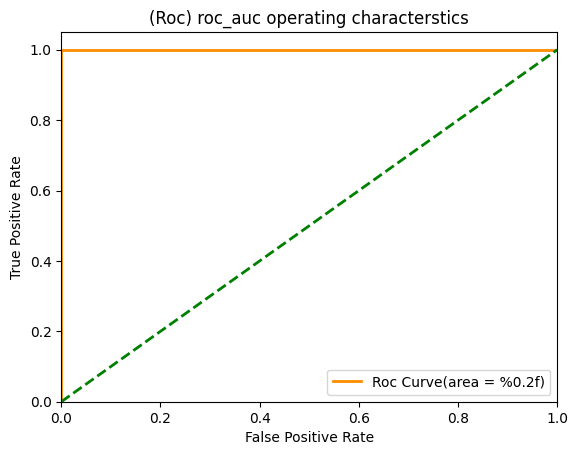

In [46]:
plt.Figure(figsize=(8,6))
plt.plot(fpr,tpr,color = 'darkorange',linewidth = 2,label = 'Roc Curve(area = %0.2f)')
plt.plot([0,1],[0,1],color='green',linewidth = 2,linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(Roc) roc_auc operating characterstics')
plt.legend(loc = 'lower right')
plt.show()

### Logistic Regression CrossValidation

In [47]:
from sklearn.linear_model import LogisticRegressionCV

In [48]:
lrcv_model = LogisticRegression()

In [49]:
lrcv_model.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred_lrcv = lrcv_model.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred_lrcv)

1.0

In [52]:
from sklearn.model_selection import KFold

In [68]:
cv = KFold(n_splits=6)

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
score= cross_val_score(lr_model,x_train,y_train,cv=cv,scoring="accuracy")

In [71]:
score

array([1., 1., 1., 1., 1., 1.])

In [72]:
np.mean(score)

1.0